In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p' ,'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p' ,'rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p' ,'rb') as f:
  test_data = pickle.load(f)
  
  
  
  
X_train , y_train = train_data['features'] , train_data['labels']
X_val , y_val = val_data['features'] , val_data['labels']
X_test , y_test = test_data['features'] , test_data['labels']

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [7]:
assert(X_train.shape[0] == y_train.shape[0] , 'number of images are not equal')
assert(X_val.shape[0] == y_val.shape[0] , 'number of images are not equal')
assert(X_test.shape[0] == y_test.shape[0] , 'number of images are not equal')
assert(X_train.shape[1:] == (32,32,3) , 'wromg dim')
assert(X_val.shape[1:] == (32,32,3) , 'wromg dim')
assert(X_test.shape[1:] == (32,32,3) , 'wromg dim')


<ipython-input-7-10e979f0e9f5>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_train.shape[0] == y_train.shape[0] , 'number of images are not equal')
<ipython-input-7-10e979f0e9f5>:2: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_val.shape[0] == y_val.shape[0] , 'number of images are not equal')
<ipython-input-7-10e979f0e9f5>:3: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_test.shape[0] == y_test.shape[0] , 'number of images are not equal')
<ipython-input-7-10e979f0e9f5>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_train.shape[1:] == (32,32,3) , 'wromg dim')
<ipython-input-7-10e979f0e9f5>:5: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_val.shape[1:] == (32,32,3) , 'wromg dim')
<ipython-input-7-10e979f0e9f5>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(X_test.shape[1:] == (32,3

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

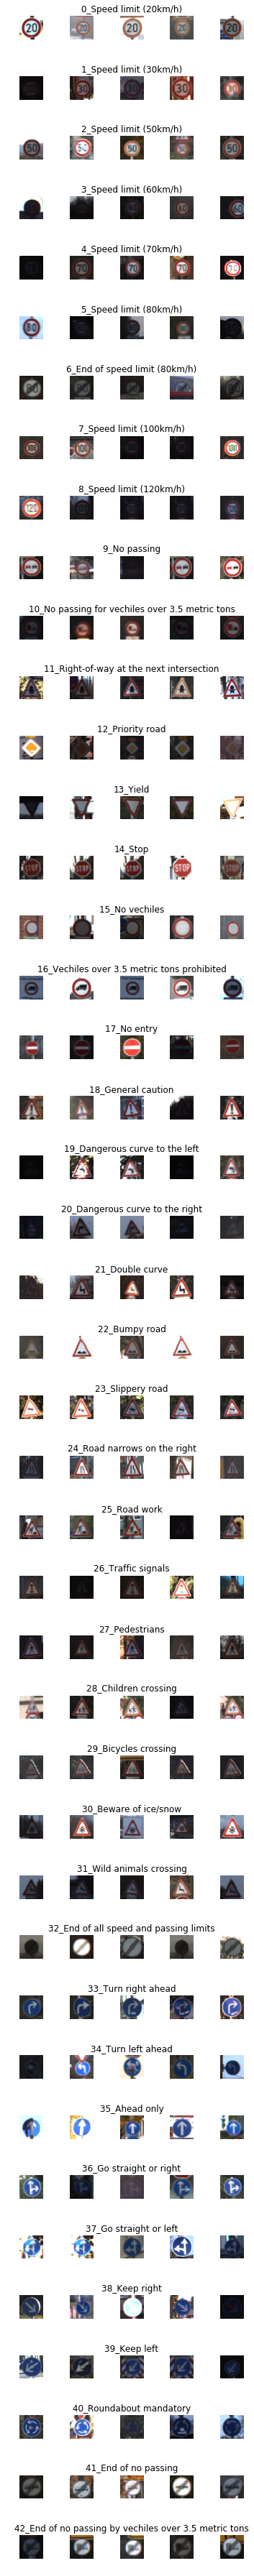

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print (data)
num_of_samp =[]

num_of_class =43
cols =5
 
fig, axs = plt.subplots(nrows=num_of_class, ncols=cols, figsize=(5,50))
fig.tight_layout()


for i in range(cols):
  for j,row in data.iterrows():
    x_select = X_train[y_train==j]
    axs[j][i].imshow(x_select[random.randint(0,len(x_select)-1) , :,: ] , cmap = plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j)+"_"+row["SignName"])
      num_of_samp.append(len(x_select))



[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


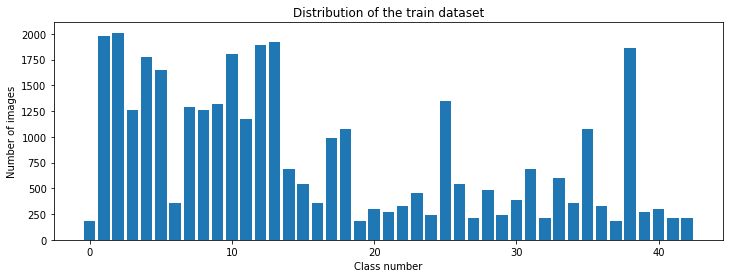

In [9]:
print(num_of_samp)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_class), num_of_samp)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
41


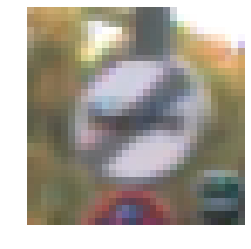

In [10]:
import cv2
print(X_train[100].shape)
plt.imshow(X_train[100])
plt.axis('off')
print(y_train[100])

In [0]:
def grayscale(img):
  gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
  return gray

(32, 32)


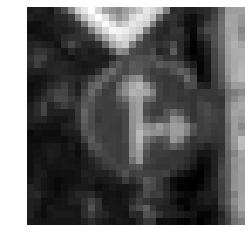

In [12]:
img = X_train[1000]
img  = grayscale(img)
plt.imshow(img,cmap = plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [0]:
def equalize(img):
  equal =  cv2.equalizeHist(img)
  return equal

(32, 32)


(-0.5, 31.5, 31.5, -0.5)

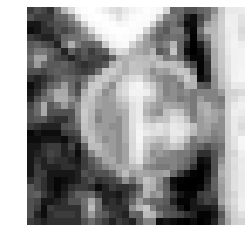

In [14]:
img = equalize(img)
print(img.shape)
plt.imshow(img , cmap = plt.get_cmap('gray'))
plt.axis('off')


In [0]:
def preprocessing(img):
  img= grayscale(img)
  img = equalize(img)
  img =img/255
  return img
  

In [0]:
X_train = np.array(list(map(preprocessing , X_train)))
X_val = np.array(list(map(preprocessing , X_val)))
X_test = np.array(list(map(preprocessing,X_test)))


(34799, 32, 32)


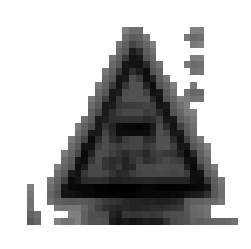

In [17]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)] , cmap =plt.get_cmap('gray'))
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799 ,32, 32,1)
X_test = X_test.reshape(12630,32,32,1)
X_val = X_val.reshape(4410,32,32,1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1 , height_shift_range = 0.1 , zoom_range = 0.2 , shear_range = 0.1 , rotation_range = 10)
datagen.fit(X_train)

(15, 32, 32, 1)


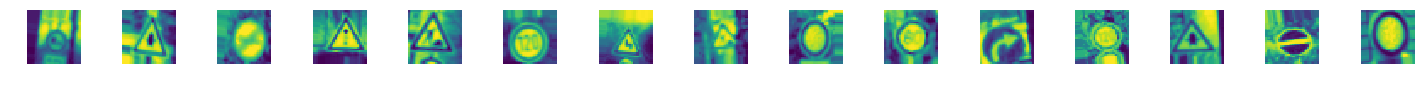

In [20]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [21]:
print(X_train.shape)

(34799, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train ,43)
y_test = to_categorical(y_test ,43)
y_val = to_categorical(y_val ,43)


In [0]:
def lenet_mod():
  model =Sequential()
  model.add(Conv2D(60 , (5,5) , input_shape = (32,32,1),activation = 'relu'))
  model.add(Conv2D(60 , (5,5) , input_shape = (32,32,1),activation = 'relu'))
  
  model.add(MaxPooling2D((2,2)))
  
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  
  
  model.add(MaxPooling2D((2,2)))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation ='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_of_class , activation ='softmax'))
  model.compile(Adam(lr=0.001) , loss ='categorical_crossentropy' , metrics =['accuracy'])
  return model

In [24]:
model =lenet_mod()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
h = model.fit_generator(datagen.flow(X_train ,y_train ,batch_size =50 ), steps_per_epoch = 2000, epochs =10 ,validation_data =(X_val,y_val) ,shuffle =1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.8900 - acc: 0.7413 - val_loss: 0.0744 - val_acc: 0.9762
Epoch 2/10
2000/2000 [==============================] - 30s 15ms/step - loss: 0.2112 - acc: 0.9348 - val_loss: 0.0490 - val_acc: 0.9846
Epoch 3/10
2000/2000 [==============================] - 30s 15ms/step - loss: 0.1421 - acc: 0.9555 - val_loss: 0.0288 - val_acc: 0.9921
Epoch 4/10
1551/2000 [======================>.......] - ETA: 6s - loss: 0.1130 - acc: 0.9651

In [0]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend('training' , 'validation')
plt.title('acc')
plt.xlabel('epoch')

In [0]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend('training' , 'validation')
plt.title('loss')
plt.xlabel('epoch')

In [0]:
score =model.evaluate(X_test,y_test,verbose =0)

print('score: ',score[0])
print('test acc: ',score[1])


In [0]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url,stream = True)
img= Image.open(r.raw)
plt.imshow(img , cmap = plt.get_cmap('gray'))

In [0]:
img =np.asarray(img)
img =cv2.resize(img , (32,32))
img = preprocessing(img)
plt.imshow(img ,cmap =plt.get_cmap('gray'))
print(img.shape)

In [0]:
img =img.reshape(1,32,32,1)

In [0]:
print('predicted sign:'+str(model.predict_classes(img)))